DB-SCAN

In [34]:
import pandas as pd

Have imported all the necessary libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import queue
from scipy.io import arff
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Function for calculating distance of each data points with other data points using Euclidean Distance Formula.
And then compared it with epsilon , if its less then append it in points.

In [36]:
def neighbour(data, pointId, epsilon):
    points = []
    for i in range(len(data)):
        # Euclidian distance
        if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
            points.append(i)
    return points

DBSCAN Function
Here, I have passed normalised data along with epsilon and min points.
I have intialised a Queue to put all neigbour core point in queue and find neigbour's neigbour.

In [37]:
def dbscan(data,Eps,MinPt):
    point_label = [0] * len(data)
    point_count = []
    core = []
    noncore =[]
    border = []
    for i in range(len(data)):
        point_count.append(neighbour(data, i, Eps))
    
    for i in range(len(point_count)):                       #checking if count greater than minpts then append it in core
        if (len(point_count[i]) >= MinPt):                  #else in noncore points
            point_label[i] = core
            core.append(i)
        else:
            noncore.append(i)                                #Finding all core points, border and noise

    for i in border:
        for j in point_count[i]:
            if j in core:
                point_label[i] = border
                border.append(i)
                break
     
    C=1
    for i in range(len(point_label)):
        q = queue.Queue()                                        #Initialization of Queue
        if (point_label[i] == core):
            point_label[i] = C
            for x in point_count[i]:
                if(point_label[x] == core):
                    q.put(x)
                    point_label[x] = C
                elif(point_label[x] == border):
                    point_label[x] = C
            while not q.empty():
                neighbors = point_count[q.get()]
                for y in neighbors:
                    if (point_label[y] == core):
                        point_label[y] = C
                        q.put(y)
                    if (point_label[y] == border):
                        point_label[y] = C
            C += 1  # Move on to the next cluster
    print("no. of clusters are: ", end = ' ')
    print(C-1)       
    return core,border,point_label, C


plotResult function is used for plotting core & border points .

In [38]:
def plotResult(data, clusterRes, clusterNum,core,border):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):

      color = scatterColors[i % len(scatterColors)]
      x1 = [];  y1 = []
      for j in range(nPoints):
          if clusterRes[j] == i:
              x1.append(data[j, 1])
              y1.append(data[j, 5])                                       #for Cluster 1 only
      plt.scatter(x1, y1, c=color, alpha=1, marker='.')
    
    #first cluster core point
    c1core = []
    for point in core:
      if clusterRes[point] == 1:
        # length = length + 1
        c1core.append(point)
    print("Cluster 1 core points:", c1core)

    #first cluster core point
    c1border = []
    for point in border:
      if clusterRes[point] == 1:
        # length = length + 1
        c1border.append(point)
    print("Cluster 1 borders:", c1border)

Our Main Function in which i have called dbscan function AND plotResult Function.

In [39]:
import collections
def main():
    df = arff.loadarff('diabetes1.arff')
    df = pd.DataFrame(df[0])
    df = df.drop(['class'], axis = 1)
    data = df.iloc[:,0:8]
    data = df.values
 
    noise = 0
    unvisited = 0
    core=-1
    edge=-2
    X = StandardScaler().fit_transform(data)
    core,border,point_label, C = dbscan(X, 2, 5)
    print(core,border,point_label, C)
    plotResult(X, point_label, C,core,border)
    plt.show()
    print('number of cluster found: ' + str(C-1))
    counter=collections.Counter(point_label)
    print(counter)
    noise  = point_label.count(0)
    print('number of Noise found: '+str(noise) +'\n')

no. of clusters are:  3
[0, 1, 2, 3, 5, 6, 7, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 180, 181, 183, 184, 185, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 222, 223, 224, 225, 226, 227, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 

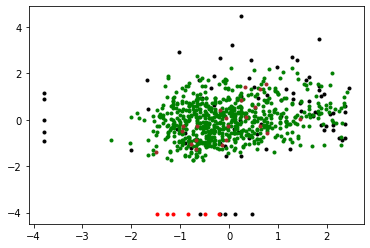

number of cluster found: 3
Counter({1: 658, 0: 83, 2: 21, 3: 6})
number of Noise found: 83



In [40]:
if __name__ == "__main__":
    main()                                                       #calling main function